In [9]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

import warnings


In [10]:
def load_dataset(data_path):
    df=pd.read_csv(data_path)
    return df
data_path='//kaggle/input/fertilizer-dataset/Fertilizer Prediction.csv'
df=load_dataset(data_path)

In [11]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [12]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [13]:
dropped_column = df.pop('Fertilizer Name')

In [14]:
columns_to_drop = ['Soil Type', 'Crop Type']

# Drop the specified columns
# df = df.drop(columns=columns_to_drop)


In [15]:
dropped_columns = df[columns_to_drop]

In [16]:
df = df.drop(columns=columns_to_drop)

In [17]:
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0
...,...,...,...,...,...,...
94,25,50,32,24,0,19
95,30,60,27,4,17,17
96,38,72,51,39,0,0
97,36,60,43,15,0,41


In [18]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(df)
df= pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
print("All features are now scaled")

All features are now scaled


In [19]:
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,-1.229084,-1.230737,-0.462064,1.567539,-0.584910,-1.387607
1,-0.368145,-1.230737,0.162128,-0.598658,-0.584910,1.297209
2,1.066752,1.006492,1.678023,-1.031898,0.970777,0.849740
3,0.492793,0.490209,-0.818745,0.267821,-0.584910,0.103958
4,-0.655125,-0.886548,0.251298,1.394244,-0.584910,-1.387607
...,...,...,...,...,...,...
94,-1.516063,-1.574926,-0.997086,0.441117,-0.584910,0.029379
95,-0.081166,0.146020,-1.442938,-1.291841,2.353610,-0.119777
96,2.214670,2.211154,0.697150,1.740835,-0.584910,-1.387607
97,1.640711,0.146020,-0.016213,-0.338715,-0.584910,1.670100


In [20]:

df[columns_to_drop] = dropped_columns

In [21]:
df['Fertilizer Name'] = dropped_column

In [22]:
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type,Crop Type,Fertilizer Name
0,-1.229084,-1.230737,-0.462064,1.567539,-0.584910,-1.387607,Sandy,Maize,Urea
1,-0.368145,-1.230737,0.162128,-0.598658,-0.584910,1.297209,Loamy,Sugarcane,DAP
2,1.066752,1.006492,1.678023,-1.031898,0.970777,0.849740,Black,Cotton,14-35-14
3,0.492793,0.490209,-0.818745,0.267821,-0.584910,0.103958,Red,Tobacco,28-28
4,-0.655125,-0.886548,0.251298,1.394244,-0.584910,-1.387607,Clayey,Paddy,Urea
...,...,...,...,...,...,...,...,...,...
94,-1.516063,-1.574926,-0.997086,0.441117,-0.584910,0.029379,Clayey,Pulses,28-28
95,-0.081166,0.146020,-1.442938,-1.291841,2.353610,-0.119777,Red,Tobacco,10-26-26
96,2.214670,2.211154,0.697150,1.740835,-0.584910,-1.387607,Loamy,Wheat,Urea
97,1.640711,0.146020,-0.016213,-0.338715,-0.584910,1.670100,Sandy,Millets,DAP


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def preprocess_dataset(df):
    columns_dtypes_dict = df.columns.to_series().groupby(df.dtypes).groups
    columns_dtypes_dict = {k.name: list(v) for k, v in columns_dtypes_dict.items()}
    numerical_columns = columns_dtypes_dict["float64"]
    categorical_columns = columns_dtypes_dict["object"]
    categorical_columns.remove("Fertilizer Name")
    LE = LabelEncoder()
    OHE = OneHotEncoder(sparse = False, drop = 'first')
    for col in categorical_columns:
        #df[col] = df[[col]].apply(LE.fit_transform)
        encoded_col = OHE.fit_transform(df[[col]].values.reshape(-1, 1))
        new_col_names = [f"{class_}" for class_ in OHE.get_feature_names_out([col])]
        encoded_data = pd.DataFrame(encoded_col, columns = new_col_names, index = df.index)
        df= pd.concat([df, encoded_data], axis=1)
        df= df.drop(columns = [col]) #main column will be dropped and its one hot 
                                     #encoded ones will be saved
    df["Fertilizer Name"] = df[["Fertilizer Name"]].apply(LE.fit_transform)
    fertilizer_name = df['Fertilizer Name']
    df.pop("Fertilizer Name")
    df["Fertilizer Name"] = fertilizer_name
    return LE, OHE, df

LE, OHE, df = preprocess_dataset(df)
df

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,...,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name
0,-1.229084,-1.230737,-0.462064,1.567539,-0.584910,-1.387607,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,-0.368145,-1.230737,0.162128,-0.598658,-0.584910,1.297209,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
2,1.066752,1.006492,1.678023,-1.031898,0.970777,0.849740,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.492793,0.490209,-0.818745,0.267821,-0.584910,0.103958,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
4,-0.655125,-0.886548,0.251298,1.394244,-0.584910,-1.387607,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.516063,-1.574926,-0.997086,0.441117,-0.584910,0.029379,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
95,-0.081166,0.146020,-1.442938,-1.291841,2.353610,-0.119777,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
96,2.214670,2.211154,0.697150,1.740835,-0.584910,-1.387607,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
97,1.640711,0.146020,-0.016213,-0.338715,-0.584910,1.670100,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [24]:
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,...,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name
0,-1.229084,-1.230737,-0.462064,1.567539,-0.584910,-1.387607,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,-0.368145,-1.230737,0.162128,-0.598658,-0.584910,1.297209,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
2,1.066752,1.006492,1.678023,-1.031898,0.970777,0.849740,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.492793,0.490209,-0.818745,0.267821,-0.584910,0.103958,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
4,-0.655125,-0.886548,0.251298,1.394244,-0.584910,-1.387607,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6


In [25]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,...,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,-2.702664e-16,4.923110e-16,1.951301e-16,-4.037175e-17,-4.037175e-17,4.037175e-17,0.202020,0.212121,0.191919,0.202020,...,0.070707,0.060606,0.111111,0.070707,0.101010,0.101010,0.131313,0.070707,0.090909,3.636364
std,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,0.403551,0.410891,0.395814,0.403551,...,0.257639,0.239821,0.315869,0.257639,0.302876,0.302876,0.339461,0.257639,0.288943,1.950691
min,-1.516063e+00,-1.574926e+00,-1.621278e+00,-1.291841e+00,-5.849104e-01,-1.387607e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.551248e-01,-8.865477e-01,-8.187455e-01,-7.719541e-01,-5.849104e-01,-7.164029e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,-8.116590e-02,1.460196e-01,-1.945534e-01,-5.120103e-01,-5.849104e-01,2.937930e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,7.797724e-01,8.343978e-01,6.525645e-01,4.411166e-01,7.114955e-01,8.497398e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,2.214670e+00,2.211154e+00,1.945534e+00,2.000779e+00,2.699318e+00,1.744678e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [26]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type_Clayey', 'Soil Type_Loamy', 'Soil Type_Red',
       'Soil Type_Sandy', 'Crop Type_Cotton', 'Crop Type_Ground Nuts',
       'Crop Type_Maize', 'Crop Type_Millets', 'Crop Type_Oil seeds',
       'Crop Type_Paddy', 'Crop Type_Pulses', 'Crop Type_Sugarcane',
       'Crop Type_Tobacco', 'Crop Type_Wheat', 'Fertilizer Name'],
      dtype='object')

In [27]:
features = df[['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type_Clayey', 'Soil Type_Loamy', 'Soil Type_Red',
       'Soil Type_Sandy', 'Crop Type_Cotton', 'Crop Type_Ground Nuts',
       'Crop Type_Maize', 'Crop Type_Millets', 'Crop Type_Oil seeds',
       'Crop Type_Paddy', 'Crop Type_Pulses', 'Crop Type_Sugarcane',
       'Crop Type_Tobacco', 'Crop Type_Wheat']]
target = df['Fertilizer Name']
labels = df['Fertilizer Name']

In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

## RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def XGB(Xtrain, Ytrain):
    XGB = RandomForestClassifier(n_estimators=20, random_state=0)
    score = cross_val_score(XGB,features,target,cv=5)
    print("Cross-Validation Accuracy Scores: ", score)
    XGB.fit(Xtrain,Ytrain)
    return RF

XGB = XGB(Xtrain, Ytrain)
XGB

Cross-Validation Accuracy Scores:  [0.8  0.95 0.95 0.9  1.  ]


RandomForestClassifier(n_estimators=20, random_state=0)

In [33]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XGB_pkl_filename = 'XGB.pkl'
# Open the file to save as pkl file
XGB_Model_pkl = open(XGB_pkl_filename, 'wb')
pickle.dump(XGB, XGB_Model_pkl)
# Close the pickle instances
XGB_Model_pkl.close()

In [34]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score


def RF(Xtrain, Ytrain):
    RF = xgb.XGBClassifier()
    score = cross_val_score(RF,features,target,cv=5)
    print("Cross-Validation Accuracy Scores: ", score)
    RF.fit(Xtrain,Ytrain)
    return RF

RF_model = RF(Xtrain, Ytrain)
RF_model

Cross-Validation Accuracy Scores:  [0.95 1.   0.95 1.   1.  ]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
def predict_RF(RF_model, Xtest, Ytest):
    predicted_values = RF_model.predict(Xtest)
    x = metrics.accuracy_score(Ytest, predicted_values)
    print("RF Accuracy is: ", x)
    
pred_RF = predict_RF(RF_model, Xtest, Ytest)
pred_RF

RF Accuracy is:  0.95


In [38]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XGBoost_model, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

NameError: name 'acc' is not defined

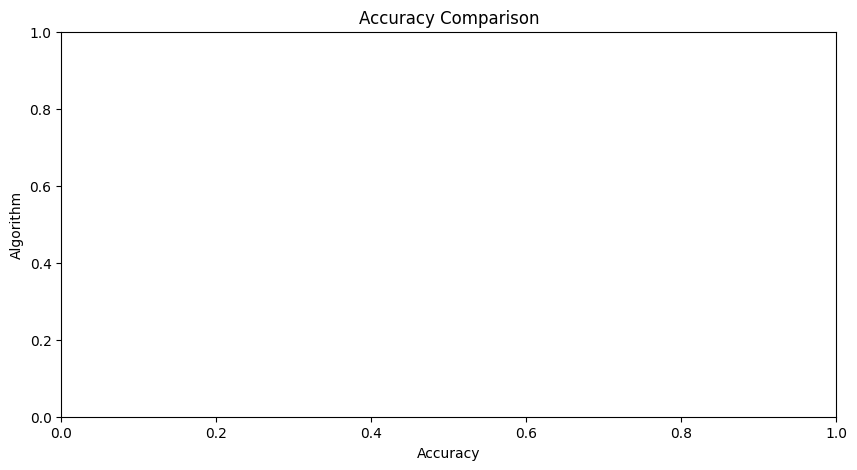

In [39]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [24]:
Xtest

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
93,-0.655125,-0.886548,-1.621278,-0.858602,1.143631,0.849740,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,-0.368145,-0.198169,-0.283724,0.441117,-0.584910,0.327692,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,1.066752,1.006492,0.964661,1.654187,-0.584910,-1.387607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24,0.779772,0.834398,-0.372894,-0.512010,-0.584910,-0.641825,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16,0.779772,0.834398,-0.818745,1.654187,-0.584910,-1.387607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23,-0.655125,-0.886548,-0.551235,1.480891,-0.584910,-1.387607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.066752,1.006492,1.678023,-1.031898,0.970777,0.849740,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.492793,0.490209,-1.175427,1.654187,-0.584910,-1.387607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28,1.927690,1.866965,-0.997086,-0.598658,-0.584910,1.520944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,0.492793,0.490209,-0.194553,0.441117,-0.584910,0.253114,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
def predict(data, model):
    data = pd.DataFrame([input_data], columns=Xtrain.columns)
    prediction = model.predict(data)
    prediction=LE.inverse_transform(prediction)[0]
    return prediction

In [26]:
input_data = [-0.655125,-0.886548,-1.621278,-0.858602,1.143631,0.849740,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
result = predict(input_data, RF)
print(result)

14-35-14
